## 12-2. Boston 주택가격 예측모델

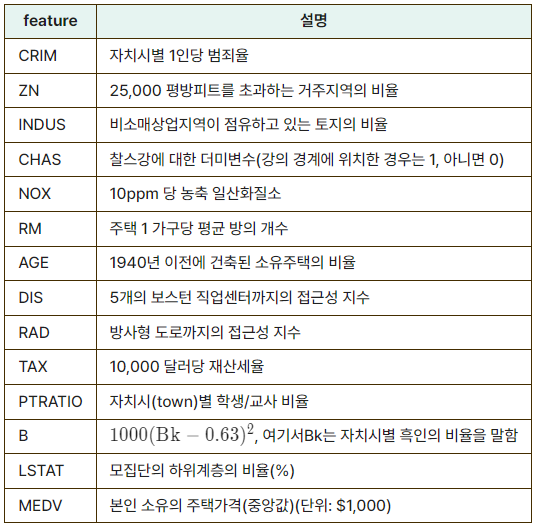

- 주택 가격을 예측해야됨
- 각 feature의 값 범위가 서로 달라서 전처리 과정에서 표준화 과정을 진행함

### 데이터 로드 및 전처리

In [36]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [37]:
# 표준화 과정
mean = train_data.mean(axis=0)
train_data = train_data - mean

std = train_data.std(axis=0)
train_data = train_data / std

# Data Leakage를 막기 위해서 train data의 통계값을 바탕으로 표준화를 진행합니다.
test_data = test_data - mean
test_data = test_data / std

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.1)

In [55]:
model = models.Sequential()
model.add(layers.Input(shape=train_data.shape[1],))

model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'relu'))

In [56]:
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['mae'])

In [57]:
from tensorflow.keras import callbacks

early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data = [x_val, y_val],
                     callbacks=[early_stopping_cb])

Epoch 1/60
12/12 [==============================] - 1s 12ms/step - loss: 510.3545 - mae: 20.8771 - val_loss: 554.9705 - val_mae: 22.1971
Epoch 2/60
12/12 [==============================] - 0s 3ms/step - loss: 317.8076 - mae: 16.1948 - val_loss: 472.9659 - val_mae: 20.4610
Epoch 3/60
12/12 [==============================] - 0s 3ms/step - loss: 168.5688 - mae: 10.6353 - val_loss: 358.4656 - val_mae: 17.6327
Epoch 4/60
12/12 [==============================] - 0s 3ms/step - loss: 150.0498 - mae: 9.9371 - val_loss: 314.3567 - val_mae: 16.3752
Epoch 5/60
12/12 [==============================] - 0s 3ms/step - loss: 128.0627 - mae: 8.8121 - val_loss: 297.8022 - val_mae: 15.8273
Epoch 6/60
12/12 [==============================] - 0s 3ms/step - loss: 120.9988 - mae: 8.4387 - val_loss: 255.9113 - val_mae: 14.3981
Epoch 7/60
12/12 [==============================] - 0s 3ms/step - loss: 113.7319 - mae: 8.3295 - val_loss: 223.4373 - val_mae: 13.1348
Epoch 8/60
12/12 [==============================] -

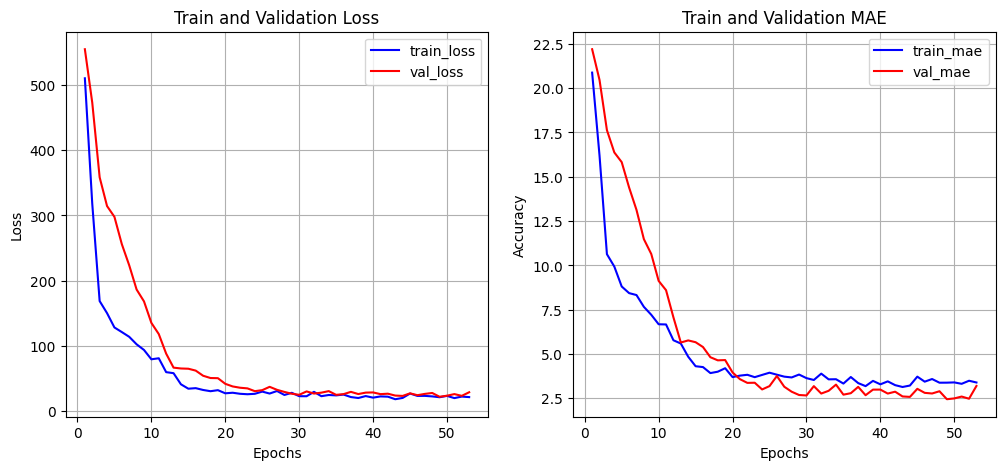

In [58]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('mae')
ax2.grid()
ax2.legend()

plt.show()

In [59]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 23.8297 - mae: 3.3483


[23.829654693603516, 3.3482532501220703]

### Reuters Model

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [62]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [63]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [125]:
model = models.Sequential()

model.add(layers.Input(shape=(x_train.shape[1])))

model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46, activation='softmax'))

In [126]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_30 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_21 (Activation)  (None, 128)               0         
                                                                 
 dropout_36 (Dropout)        (None, 128)               0         
                                                                 
 dense_72 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_31 (Ba  (None, 256)               1024      
 tchNormalization)                                   

In [127]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [128]:
check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
14/14 [==============================] - 1s 29ms/step - loss: 3.0741 - accuracy: 0.3210 - val_loss: 2.5969 - val_accuracy: 0.2097
Epoch 2/30
14/14 [==============================] - 0s 17ms/step - loss: 1.6631 - accuracy: 0.6201 - val_loss: 2.3192 - val_accuracy: 0.4693
Epoch 3/30
14/14 [==============================] - 0s 17ms/step - loss: 1.3304 - accuracy: 0.6865 - val_loss: 2.2531 - val_accuracy: 0.4809
Epoch 4/30
14/14 [==============================] - 0s 17ms/step - loss: 1.1312 - accuracy: 0.7319 - val_loss: 2.2232 - val_accuracy: 0.4702
Epoch 5/30
14/14 [==============================] - 0s 20ms/step - loss: 0.9983 - accuracy: 0.7634 - val_loss: 2.2007 - val_accuracy: 0.5107
Epoch 6/30
14/14 [==============================] - 0s 17ms/step - loss: 0.8643 - accuracy: 0.7870 - val_loss: 2.1738 - val_accuracy: 0.5196
Epoch 7/30
14/14 [==============================] - 0s 17ms/step - loss: 0.7528 - accuracy: 0.8159 - val_loss: 2.1398 - val_accuracy: 0.5307
Epoch 8/30
14

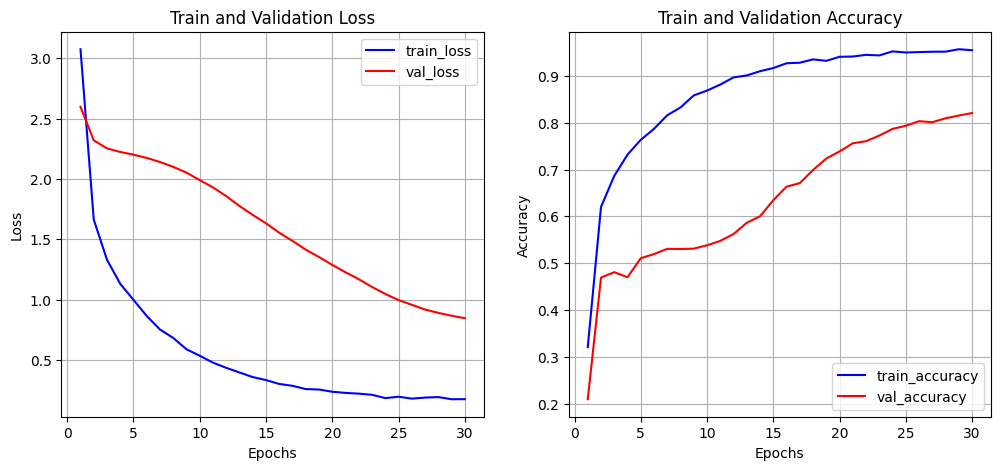

In [129]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [130]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 944us/step - loss: 0.9499 - accuracy: 0.7885


[0.9499149918556213, 0.7885128855705261]

### CIFAR 10 Deeplearning Model

- 10개의 클래스를 분류하기 위한 이미지 데이터
- 전처리 : 32*32*3 을 3072 크기로 변형, 0~255 사이의 값을 갖는 이미지를 0~1 사이의 값으로 변환

In [132]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [137]:
(train_data, train_labels), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2)

print("전체 학습 데이터: {} 레이블: {}".format(train_data.shape, train_data.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 32, 32, 3)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [138]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

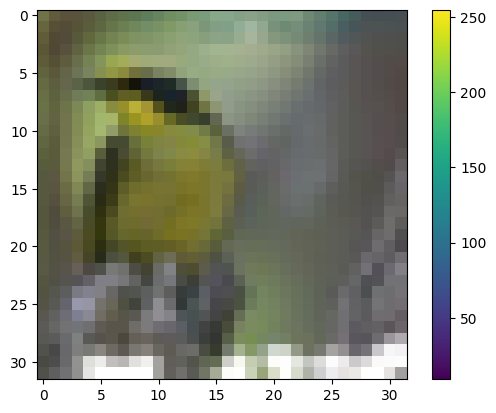

In [140]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [141]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [143]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
import tensorflow as tf
x_train = tf.reshape(x_train, [40000, 3072])
x_val = tf.reshape(x_val, [10000, 3072])
x_test = tf.reshape(x_test, [10000, 3072])

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [144]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = tf.cast(x_train, tf.float32) / 255.
x_val = tf.cast(x_val, tf.float32) / 255.
x_test = tf.cast(x_test, tf.float32) / 255.

In [149]:
model = models.Sequential()
model.add(layers.Dense(2048, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.build(x_train.shape)

In [151]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_37 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 activation_28 (Activation)  (None, 2048)              0         
                                                                 
 dropout_42 (Dropout)        (None, 2048)              0         
                                                                 
 dense_81 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_38 (Ba  (None, 1024)              4096      
 tchNormalization)                                   

In [150]:
check_point_cb = callbacks.ModelCheckpoint('cifar_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/30
79/79 [==============================] - 8s 84ms/step - loss: 2.1630 - accuracy: 0.2900 - val_loss: 3.7088 - val_accuracy: 0.2310
Epoch 2/30
 1/79 [..............................] - ETA: 6s - loss: 1.8838 - accuracy: 0.3750

c:\Users\daeho\anaconda3\envs\yolo\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - 7s 83ms/step - loss: 1.8423 - accuracy: 0.3638 - val_loss: 2.0713 - val_accuracy: 0.2919
Epoch 3/30
79/79 [==============================] - 7s 84ms/step - loss: 1.7051 - accuracy: 0.4063 - val_loss: 1.8334 - val_accuracy: 0.3419
Epoch 4/30
79/79 [==============================] - 7s 83ms/step - loss: 1.6114 - accuracy: 0.4343 - val_loss: 1.7938 - val_accuracy: 0.3671
Epoch 5/30
79/79 [==============================] - 7s 84ms/step - loss: 1.5468 - accuracy: 0.4517 - val_loss: 1.8800 - val_accuracy: 0.3308
Epoch 6/30
79/79 [==============================] - 7s 82ms/step - loss: 1.4943 - accuracy: 0.4707 - val_loss: 1.8342 - val_accuracy: 0.4099
Epoch 7/30
79/79 [==============================] - 6s 81ms/step - loss: 1.4628 - accuracy: 0.4825 - val_loss: 1.8243 - val_accuracy: 0.4013
Epoch 8/30
79/79 [==============================] - 6s 82ms/step - loss: 1.4159 - accuracy: 0.4946 - val_loss: 1.7378 - val_accuracy: 0.4100
Epoch 9/30
79/79 [======

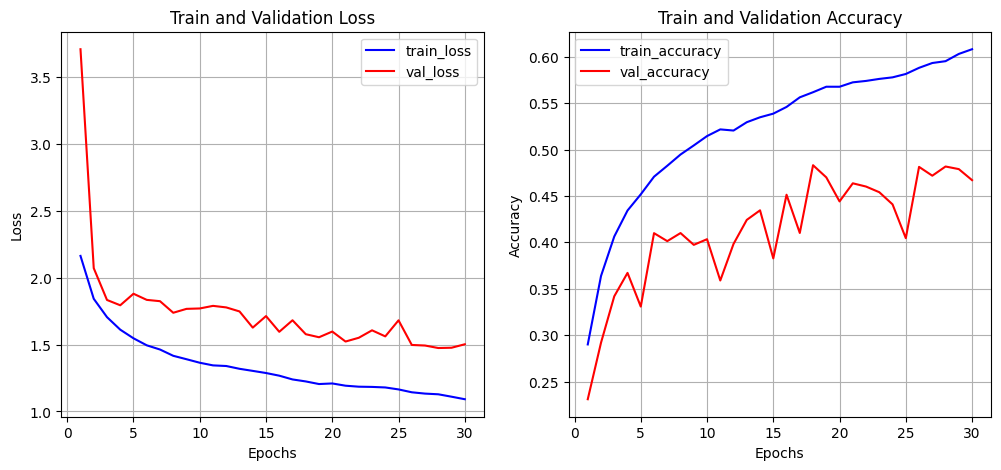

In [155]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [156]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4829 - accuracy: 0.4773


[1.4829095602035522, 0.4772999882698059]

### CIFAR10 With Conv2D Layer

In [157]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [170]:
x_train = tf.cast(x_train, tf.float32) / 255.
x_val = tf.cast(x_val, tf.float32) / 255.
x_test = tf.cast(x_test, tf.float32) / 255.

In [172]:
class ConvModel(models.Model):
    def __init__(self, **kwargs):
        super(ConvModel, self).__init__(**kwargs)

        self.conv1 = layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3))
        self.conv2 = layers.Conv2D(128, (3,3), activation='relu')

        self.pooling = layers.MaxPooling2D(2,2)
        self.batch_norm1 = layers.BatchNormalization()
        self.batch_norm2 = layers.BatchNormalization()

        self.flatten = layers.Flatten()

        self.dropout = layers.Dropout(0.5)
        self.dense1 = layers.Dense(256, activation='relu')
        self.dense2 = layers.Dense(512, activation='relu')

        self.dense3 = layers.Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pooling(x)
        x = self.batch_norm1(x)

        x = self.conv2(x)
        x = self.pooling(x)
        x = self.batch_norm2(x)

        x = self.flatten(x)

        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        x = self.dropout(x)

        return self.dense3(x)


In [173]:
model = ConvModel()
model(x_train)

<tf.Tensor: shape=(40000, 10), dtype=float32, numpy=
array([[0.10997874, 0.08414815, 0.09068051, ..., 0.10078295, 0.09800036,
        0.10171655],
       [0.10991726, 0.08388204, 0.08916897, ..., 0.09761927, 0.09868178,
        0.10549279],
       [0.1084102 , 0.08195766, 0.09033498, ..., 0.10131117, 0.09939998,
        0.10403773],
       ...,
       [0.10748278, 0.08256757, 0.09225877, ..., 0.10146887, 0.09771948,
        0.10230354],
       [0.10392123, 0.08683925, 0.09249109, ..., 0.10044175, 0.10081299,
        0.10326898],
       [0.10251781, 0.08612927, 0.09409752, ..., 0.10003245, 0.09978039,
        0.10477717]], dtype=float32)>

In [174]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [177]:
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb])

Epoch 1/10


79/79 [==============================] - 13s 169ms/step - loss: 1.1431 - accuracy: 0.5962 - val_loss: 5.7268 - val_accuracy: 0.1006
Epoch 2/10
79/79 [==============================] - 13s 168ms/step - loss: 1.0111 - accuracy: 0.6450 - val_loss: 5.6711 - val_accuracy: 0.1006
Epoch 3/10
79/79 [==============================] - 13s 169ms/step - loss: 0.9115 - accuracy: 0.6813 - val_loss: 5.8316 - val_accuracy: 0.1007
Epoch 4/10
79/79 [==============================] - 14s 175ms/step - loss: 0.8199 - accuracy: 0.7122 - val_loss: 4.6679 - val_accuracy: 0.1469
Epoch 5/10
79/79 [==============================] - 14s 172ms/step - loss: 0.7444 - accuracy: 0.7421 - val_loss: 3.1449 - val_accuracy: 0.2264
Epoch 6/10
79/79 [==============================] - 14s 172ms/step - loss: 0.6640 - accuracy: 0.7653 - val_loss: 1.5412 - val_accuracy: 0.5097
Epoch 7/10
79/79 [==============================] - 14s 173ms/step - loss: 0.6023 - accuracy: 0.7903 - val_loss: 0.8982 - val_accuracy: 0.6887
Epoch 8/10

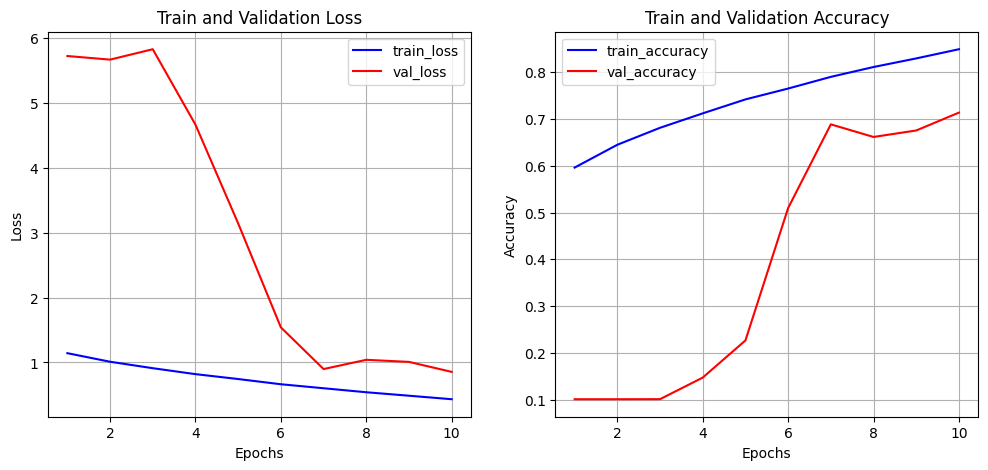

In [178]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [179]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.8583 - accuracy: 0.7179


[0.8582667112350464, 0.7178999781608582]

### 회고

- 간단한 Convolution Layer를 넣은 모델이었음에도 불구하고 test case 기준 0.4에서 0.7까지 성능향상을 얻을 수 있었다.
- 생각보다 모델링을 함에 있어서 고려해야하는 부분이 많아서 놀랍고 각각을 조정함에 따라 성능이 달라지는 것을 보니 정말 재미있었습니다.
- 하이퍼 파라미터를 튜닝하고 모델을 미세조정하는 과정은 정말 즐겁고 조금 더 깊게 확인하면 더욱 재미있을 것 같습니다.